In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from anndata import AnnData
import glob
import os
import scanpy as sc
from tqdm.notebook import tqdm
from core_functions.processing_and_filtering import *

In [6]:
data_dir = "/mnt/sata3/Dhruv_Analysis_1/2025_05_22_IL-15_KO"

In [7]:
input_folders = glob.glob(os.path.join(data_dir, "batch*"))

In [8]:
print(input_folders)

['/mnt/sata3/Dhruv_Analysis_1/2025_05_22_IL-15_KO/batch_1', '/mnt/sata3/Dhruv_Analysis_1/2025_05_22_IL-15_KO/batch_3', '/mnt/sata3/Dhruv_Analysis_1/2025_05_22_IL-15_KO/batch_2', '/mnt/sata3/Dhruv_Analysis_1/2025_05_22_IL-15_KO/batch_4']


  0%|          | 0/4 [00:00<?, ?it/s]

QC metrics for batch batch_1


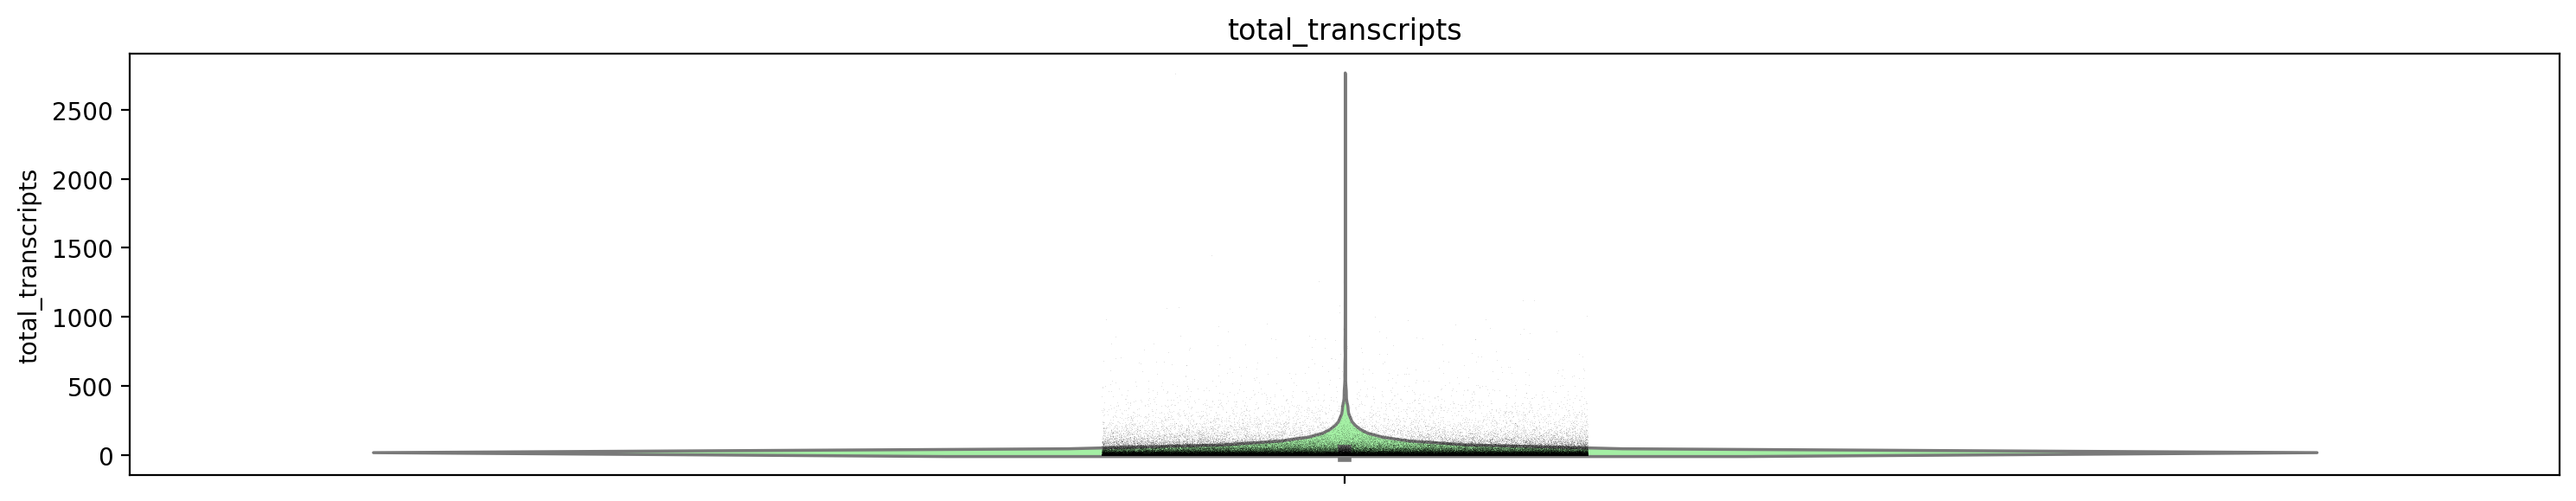

195030 cells before QC filtering
50542 cells after QC filtering
QC metrics for batch batch_3


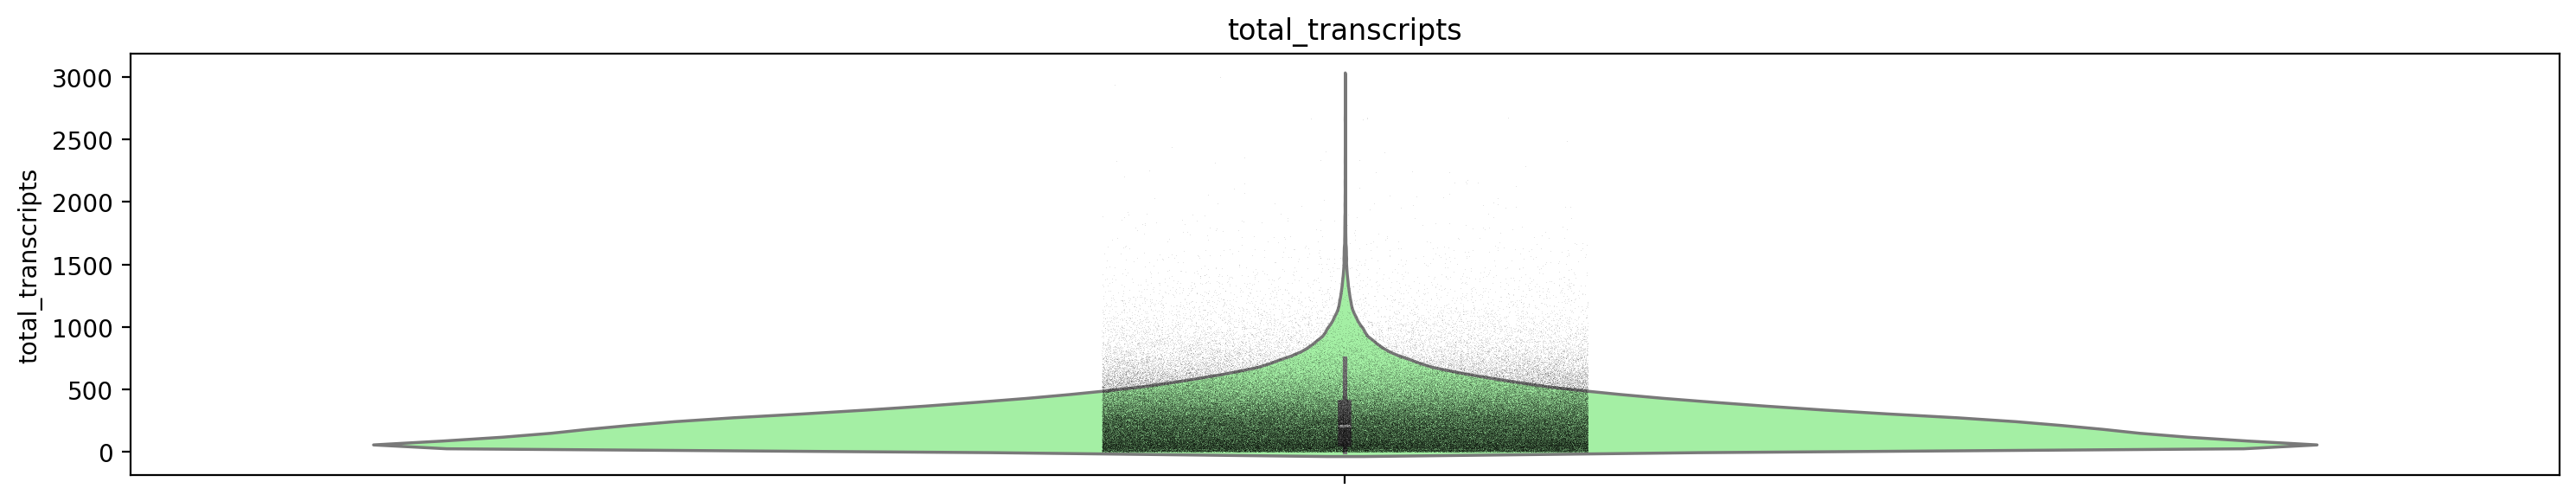

296061 cells before QC filtering
281552 cells after QC filtering
QC metrics for batch batch_2


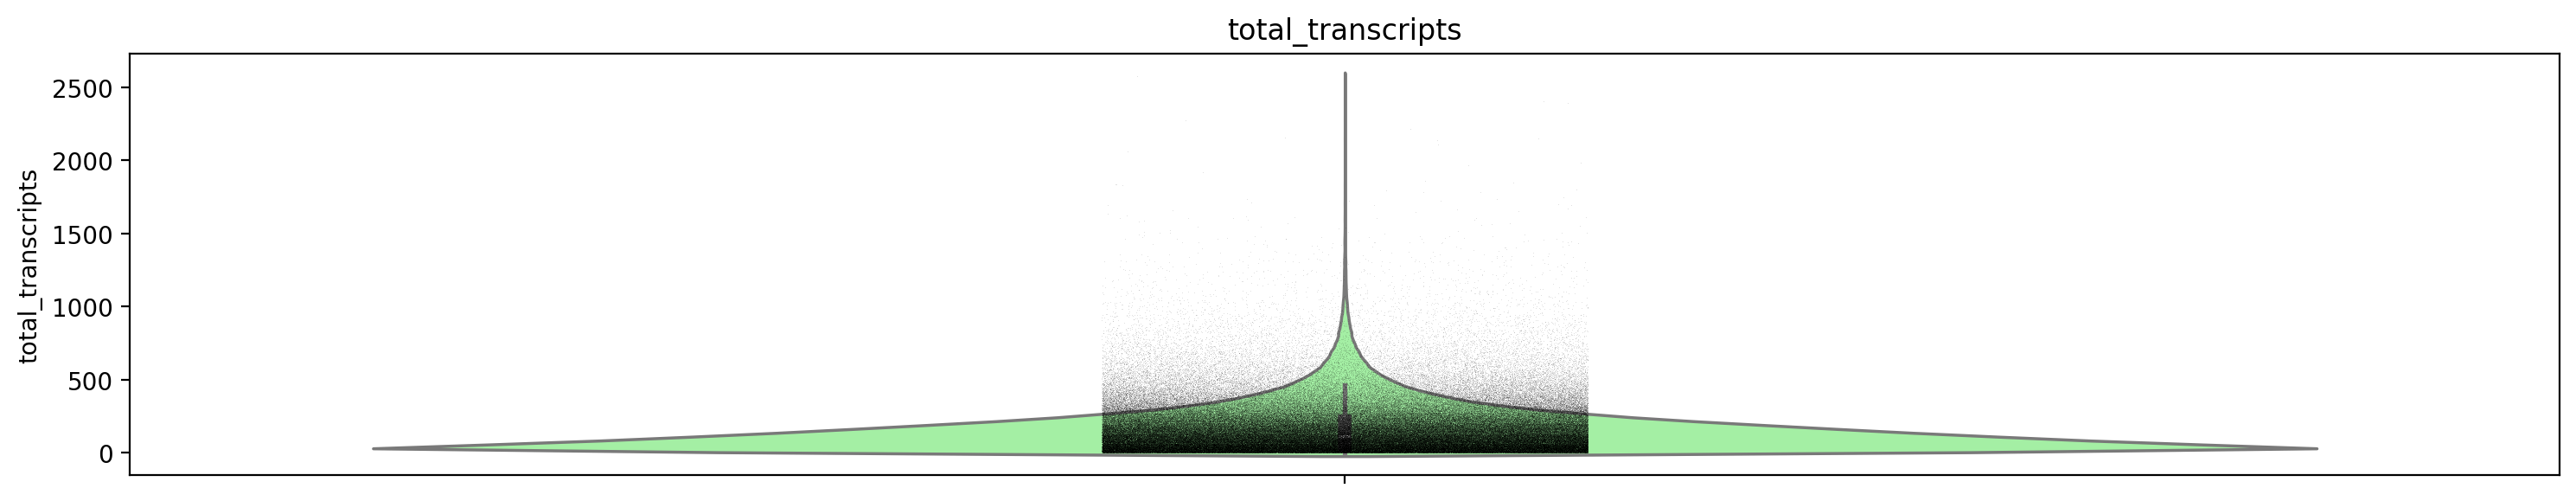

393786 cells before QC filtering
350842 cells after QC filtering
QC metrics for batch batch_4


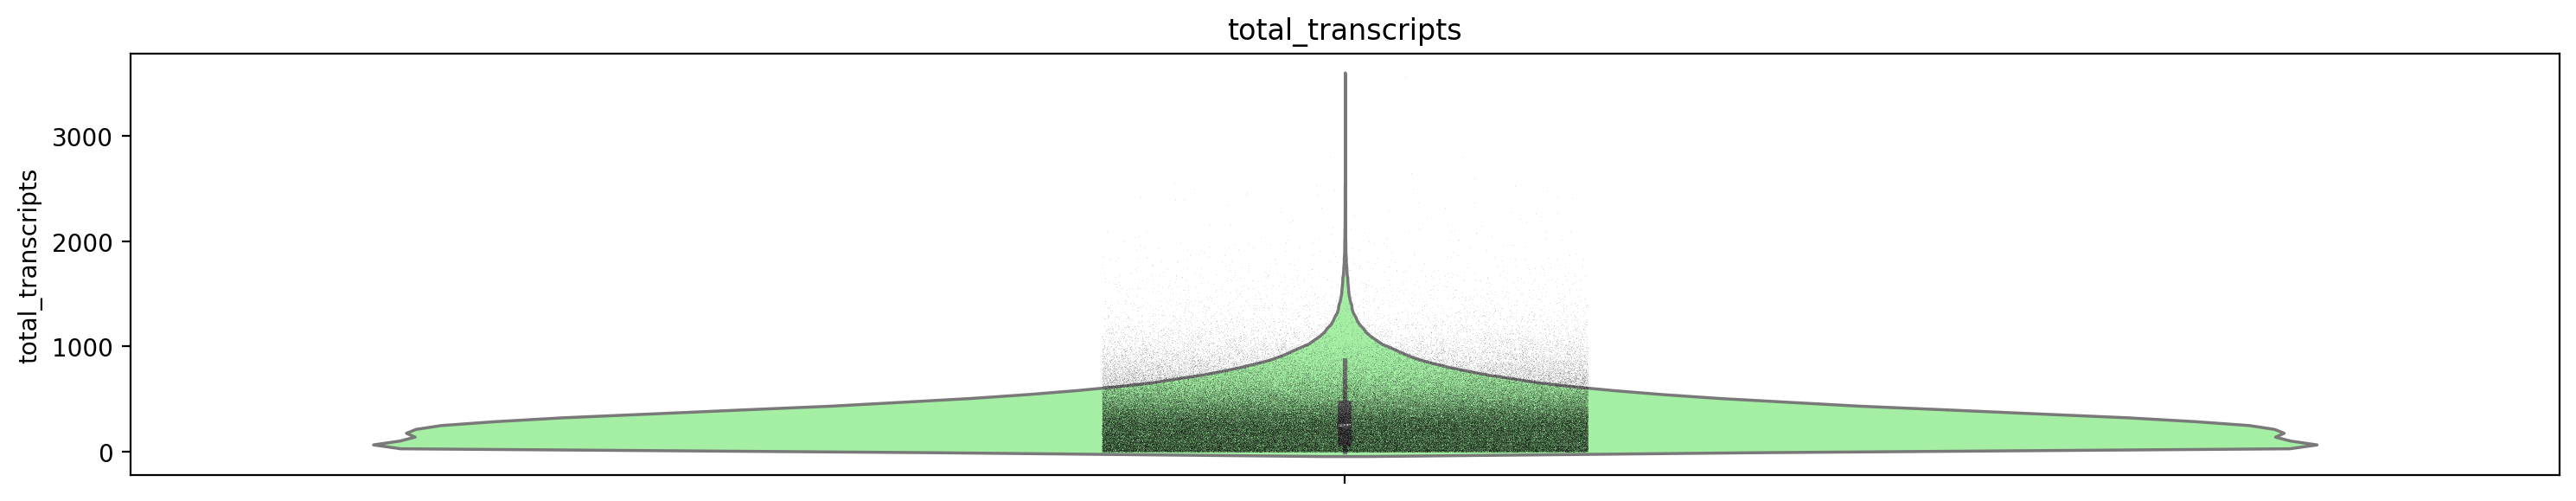

269493 cells before QC filtering
258202 cells after QC filtering


In [9]:
# for each input file in the input folders, read the adata file and get the guides
for input_file in tqdm(input_folders):
    experiment = sc.read(os.path.join(input_file, "adatas", "01_preprocessed.h5ad"))
    # focus on index values starting with Perturbation
    guides = experiment.var.index.values[experiment.var.index.str.startswith('Perturbation')]
    try:
        df = pd.DataFrame(
            #AnnData
            experiment.X.A,
            columns=experiment.var.index.values,
            index=experiment.obs.index.values,
        )
    except:
        df = pd.DataFrame(
            experiment.X,
            columns=experiment.var.index.values,
            index=experiment.obs.index.values,
        )
    experiment.obs['total_transcripts'] = experiment.X.A.sum(axis=1)

    try:
        os.mkdir(os.path.join(input_file, "figures"))
    except:
        pass

    metadata = experiment.obs
    print("QC metrics for batch " + os.path.basename(input_file))

    plot_qc_feature(df, metadata, os.path.join(input_file))


    # processes adata in helper method which thresholds the cells based on the total transcripts and the guide counts
    experiment = qc_before_clustering(experiment, guides=guides)

    experiment.write(
        os.path.join(input_file, "adatas", "02_preprocessed_and_filtered.h5ad")
    )